# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page [summary](https://docs.google.com/presentation/d/1bdJE_ErhrTySCiGTgpAS-TD9Rs-j_FWYg51PX_DPkYg/edit?usp=sharing&resourcekey=0-ghqcaAkRFeS23YosCCquGA) of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

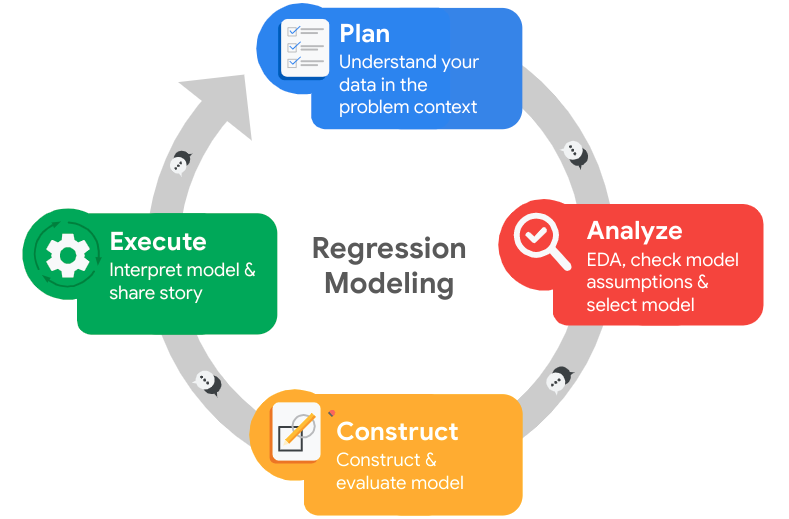



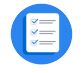

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")


df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
df1 = df0.drop_duplicates(keep='first')

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


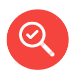
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What do you observe about the distributions in the data?

    The variables are normally distributed. However, there are some outliers that can negatively         affect the model's metrics.
- What transformations did you make with your data? Why did you chose to make those decisions?

    Yes, I changed the name of the variables, so all of them follow the same structure. Additionally,   it was necessary to eliminate null and duplicated values.
- What are some purposes of EDA before constructing a predictive model?

    The main purpose is to develop a complete analysis of the data and prepare it for the model by       data cleaning.
- What resources do you find yourself using as you complete this stage? 

    I consider that the most important tools are going to be pandas with functions such as               get_dummies() and packages from visualization libraries to clean disfunctional data.

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

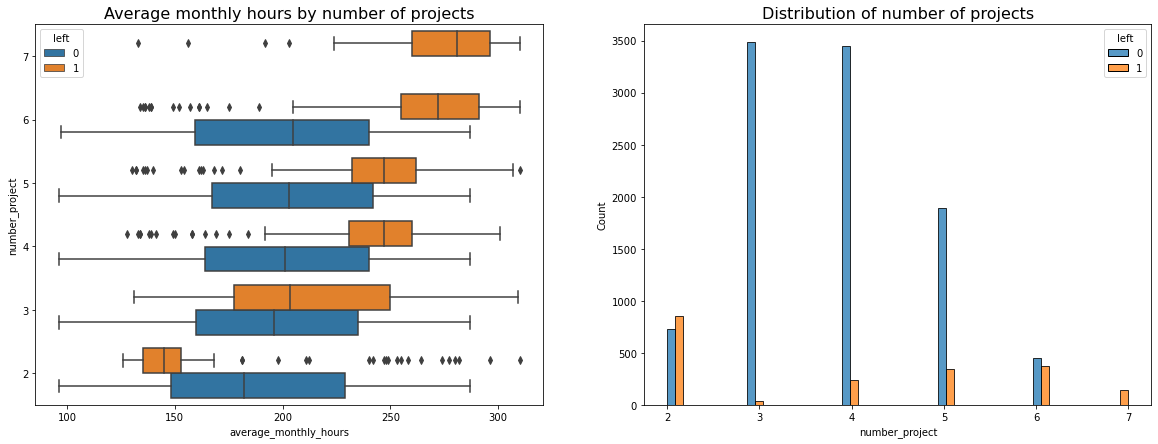

In [11]:
fig, ax = plt.subplots(1,2, figsize = (20,7))

#Boxplot to check distributions of work per number of projects

sns.boxplot(data=df1,x='average_monthly_hours',y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Average monthly hours by number of projects', fontsize=16)

# Distribution of number of projects among employees who stayed or deserted
stay= df1[df1['left']==0]['number_project']
left= df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Distribution of number of projects', fontsize=16)

plt.show()

The boxplots show the following patterns:
1. Every employee who worked on 7 projects left the company.
2. There is a significant difference between those who stayed or left: When the number of projects increased, those employees who stayed maintained a constant number of hours worked. On the other hand, those who left worked more hours as the number of projects increased.
3. Employees who worked significatively less time than those employees who stayed finally left.
4. The optimal median of worked hours per month is approximately 190-200 hours.

The histogram shows that:

   The optimal number of projects per worker are between 3 and 4. While the  worsts are 2, 6 and 7.
  
  There is a huge difference between the employees who worked on 2 projects compared to those who worked on 3 projects.

Text(0.5, 1.0, 'Monthly hours by last evaluation score of satisfaction')

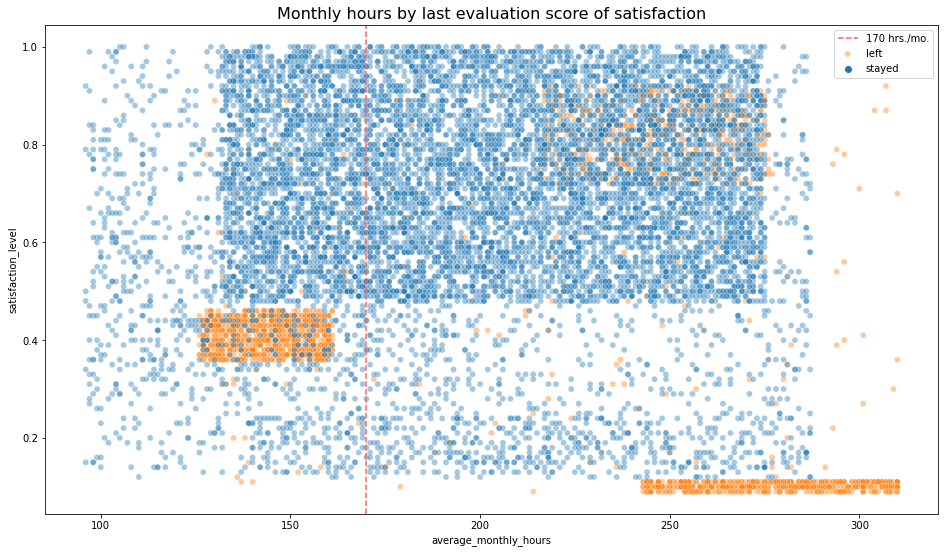

In [12]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

#line to determine the average number of worked hours with an shedule of 8 hours per day
plt.axvline(x=170, color='#ff6361', label='170 hrs./mo.', ls='--')

plt.legend(labels=['170 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score of satisfaction',fontsize=16)

The plot shows that people who left the company where divided into 3 clusters.
1. People who worked less than the average worked hours and had a satisfaction of 0.4. This satisfaction can be caused by a pressure from directives or maybe lower salaries due to they schedule.
2. People who worked more than 240 hours and showed a minimum satisfaction. This can be due to a overworkload. 
3. Satisfied people who worked between 230-270 hours and were satisfied (0.8). This cluster of people is very strange because of their good performance and good satisfaction.

Furthermore, most of the workers who stayed where in a cluster with a satisfaction level of 0.5 or higher and had an average number of hours worked.

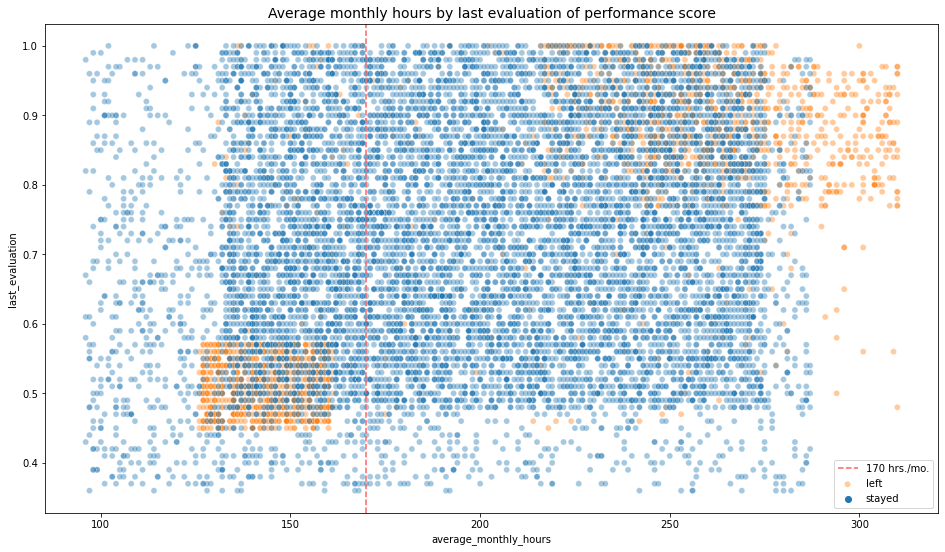

In [13]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=170, color='#ff6361', label='170 hrs./mo.', ls='--')
plt.legend(labels=['170 hrs./mo.', 'left', 'stayed'])
plt.title('Average monthly hours by last evaluation of performance score', fontsize='14');

Those who left the company where divided into 2 clusters:
1. Employees who worked less time than the normal and had a bad score (lower than 0.6). This can be due to the fact that they could be fired because of their low performance by level and worked hours.
2. Employees who worked more than 230 hours and scores very well (higher than 0.8). In part this group would be composed of 2 subgroups: those who left the company because overwork (this can be correlated to a lower satisfaction level like the cluster of the last graph), and another group of people who worked more than the normal and had a higher performance (this group can be related to the rare cluster of the last graph, which was characterized also by higher satisfaction levels).

Now it's time to see whether employees who worked more where promoted during the last 5 years.

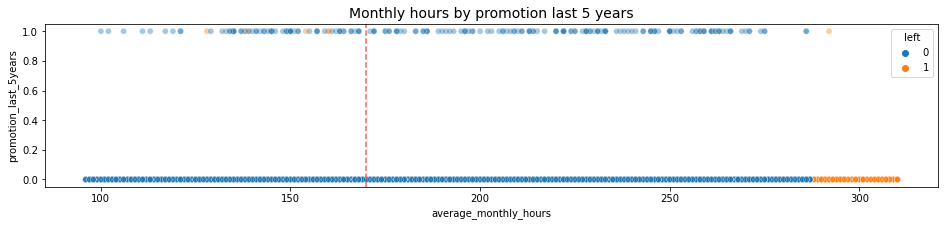

In [14]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=170, color='#ff6361', ls='--')
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

Here is an interesting feature. The graph shows that those who worked more than approx. 280 hours per month were not promoted, which is an strong factor that could explan the disatisfaction of the cluster with more hours worked. This is important to evaluate because it is necessary to understand why they were not promoted, and the most important fact, those who worked more showed a higher performance, which means that their overwork does not mean a lack of proactive work. This is very important to evaluate because this can be a key factor.

Next, it is important to evaluate the correlation between variables.

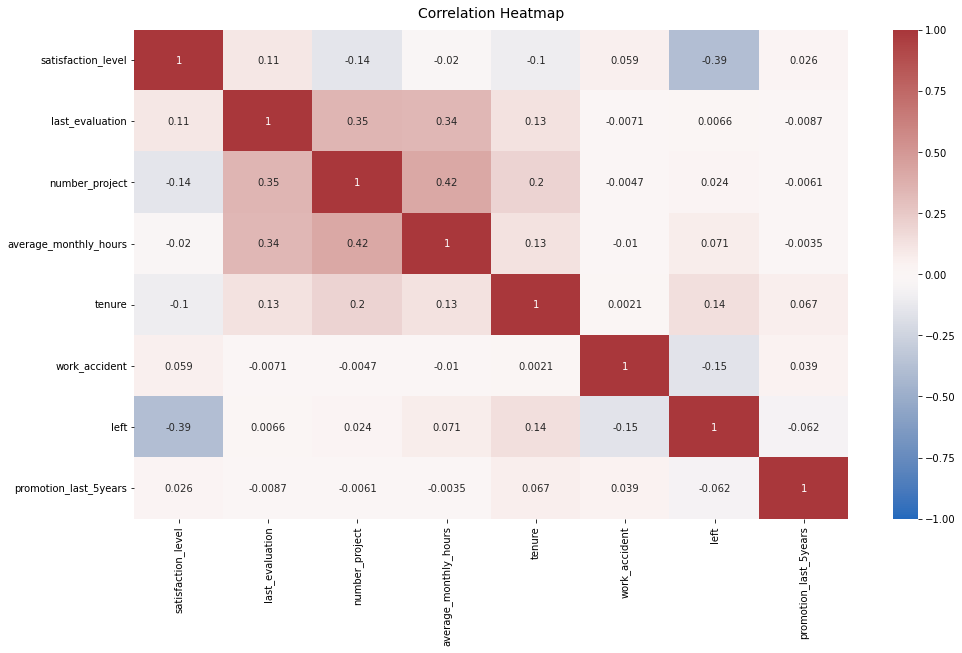

In [15]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

1. Every employee who worked on 7 projects left the company.
2. There is a significant difference between those who stayed or left: When the number of projects increased, those employees who stayed maintained a constant number of hours worked. On the other hand, those who left worked more hours as the number of projects increased.
3. Employees who worked significatively less time than those who stayed finally left.
4. The optimal median of worked hours per month is approximately 190-200 hours.
5. The optimal number of projects per worker are between 3 and 4. While the worst are 2, 6 and 7.
6. There is a huge difference between the employees who worked on 2 projects compared to those who worked on 3 projects.
7. People who left the company were divided into 3 clusters.
People who worked less than the average worked hours and had a satisfaction of 0.4. 


This satisfaction can be caused by a pressure from directives or maybe lower salaries due to their schedule.


People who worked more than 240 hours and showed a minimum satisfaction. This can be due to an over workload.


Satisfied people who worked between 230-270 hours and were satisfied (0.8). This cluster of people is very strange because of their good performance and good satisfaction.
8. Those who left the company where divided into 2 clusters:


Employees who worked less time than the normal and had a bad score (lower than 0.6). This can be due to the fact that they could be fired because of their low performance by level and worked hours.


Employees who worked more than 230 hours and scored very well (higher than 0.8). In part this group would be composed of 2 subgroups: those who left the company because overwork (this can be correlated to a lower satisfaction level like the cluster of the last graph), and another group of people who worked more than the normal and had a higher performance (this group can be related to the rare cluster of the last graph, which was characterized also by higher satisfaction levels).
9. Those who worked more than approx. 280 hours per month were not promoted, which is a strong factor that could explain the low satisfaction of the cluster with more hours worked. This is important to evaluate because it is necessary to understand why they were not promoted, and the most important fact, those who worked more showed a higher performance, which means that their overwork does not mean a lack of proactive work. This is very important to evaluate because this can be a key factor.


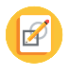
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

There is a group of employees who had good metrics (including satisfaction) and left the company.

- Which independent variables did you choose for the model and why?

I decided to choose all of the variables except satisfaction level because of its huge importance in the model but subjectivity.

- How well does your model fit the data?

Perfectly, it has pretty good metrics and a significant recall score.

- What resources do you find yourself using as you complete this stage? 

Principally packages related to decision trees of Sklearn.

- Do you have any ethical considerations in this stage?

It seems that the principal reason for leaving the company is overworking. So the company can be defficient at the moment of showing the basis of their contracts.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predict if an employee will leave the company based on their current position.

### Identify the types of models most appropriate for this task.

I consider that the best type of model for this case will be a decision tree accompanied by a random forest approach. This is because of the nature of the model, which is categorical and based on the position of the employee. In addition, a decision tree will give better results than a regression model.

### Modeling

Add as many cells as you need to conduct the modeling process.

First of all it is important to encode the variables into categorical variables.

In [16]:
df2 = pd.get_dummies(df1)

Definition of the outcome variable and independent variables.

In [17]:
y = df2['left']

x = df2.drop('left', axis=1)

Now, split the data.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

First tree to obtain the first tree for the random forest

In [19]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
           }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [20]:
%%time
tree1.fit(x_tr, y_tr)

CPU times: user 2.52 s, sys: 0 ns, total: 2.52 s
Wall time: 2.52 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [21]:
#Best Parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [22]:
#Best AUC score
tree1.best_score_

0.9703634179699269

Next, create a table to see the results of the models and have a better visualization.

In [23]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [24]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


The model has a magnificient performance by their metrics. Now, let's see the graph of level of importances of the variables in the model.

**Feature Engineering**

In [25]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns=['gini_importance'], index=x.columns)
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.520074
last_evaluation,0.180200
tenure,0.118262
number_project,0.117339
average_monthly_hours,0.064124


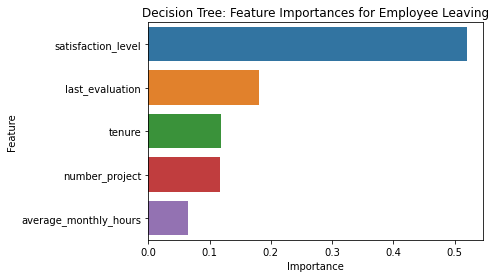

In [26]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

After the graph was created it is important to recognize a significant factor for the model. It is mostly based on a subjective feature such as "satisfaction_level", something that is not going to help to adress the current problem of the company. The main factors should be something measurable and more recognizable for the company. So, it would be a good approach decompose that variable in features related to it. As seen in the distribution of people dissatified, one of the most important factors can be that the employee can be overworked, which is directly correlated to the average_monthly_hours (a variable that rarely did not have a high importance in the model). This task would start by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked from the number of hours worked. In this case the variable would be called overworked.

In [27]:
df3 = df1.drop('satisfaction_level', axis=1)
df3['overworked'] = df3['average_monthly_hours']

#now inspect the range of the variable
print('Max hours:', df3['overworked'].max())
print('Min hours:', df3['overworked'].min())

Max hours: 310
Min hours: 96


As 170 hours was considered as a normal monthly hourly charge, it would be considered that 180 hours a characteristic of overworking, as some studies assert. Finally, to create the variable it would be a boolean where routines higher or equal to 180 hours will be considered true (1).

In [28]:
# overworked: employees who work 180 hours per month or more.
df3['overworked'] = (df3['overworked'] >= 180).astype(int)

df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [29]:
# Now delete the parent variable  
df3 = df3.drop('average_monthly_hours', axis=1)

Now perform one-hot encoding as needed

In [30]:
df4 = pd.get_dummies(df3)
df4.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Next, it is time to define the dependent and independent variables for the model.

In [31]:
y = df4['left']
x = df4.drop('left', axis=1)

Split the data into training, validating and testing.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

**Round 2**

In [33]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the model

In [34]:
%%time
tree2.fit(x_tr, y_tr)

CPU times: user 2.06 s, sys: 0 ns, total: 2.06 s
Wall time: 2.06 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

Let's check the best parameters:

In [35]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

And now check the best parameter on CV

In [36]:
tree2.best_score_

0.954227525104376

In [37]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'recall')
tree2_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree2 cv,0.952705,0.86824,0.902098,0.884811,0.96094


Now, something expected happened. The scores fell, but that is normal because less features were took into account. However, the metrics are high and the model is understandable.

Next, let's plot a confusion matrix so we can examine the model's performance more visually.

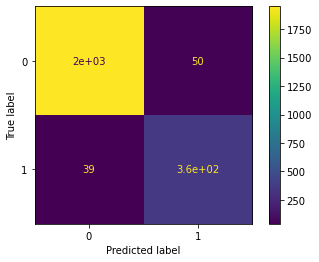

In [38]:
preds = tree2.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, preds, labels=tree2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree2.classes_)
disp.plot();

The model is efficient doing the assigned task, the distribution was pretty good and it is important to recognize that the color of the true possitive values is dark because of the distribution of the model.

**Final Feature Importance**

Let's visualize the importance of the variables in the model.

In [39]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=['gini_importance'], index=x.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.381322
last_evaluation,0.352896
tenure,0.169281
overworked,0.094122
salary_low,0.000850
department_technical,0.000427
department_sales,0.000363
work_accident,0.000297
department_accounting,0.000238
salary_high,0.000119


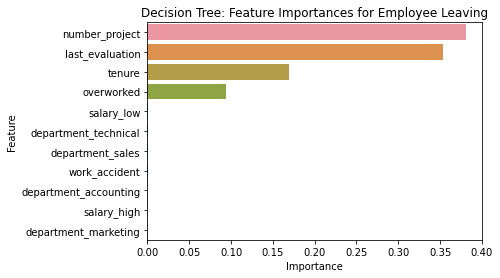

In [40]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

As seen in the barchart, the most important variables for the model are *number_project*, *last_evaluation*, *tenure*, and *overworked*. This shows that the this variables have a huge impact, so the company can evaluate this aspects as an essential part of the problem-solving. Additionally, it would be important to consider a limitation: the salaries seem to have no impact on the model, something really rare and important to be considered in a future analysis.

Finally, let's see the Decision Tree as our final result, the model itself.

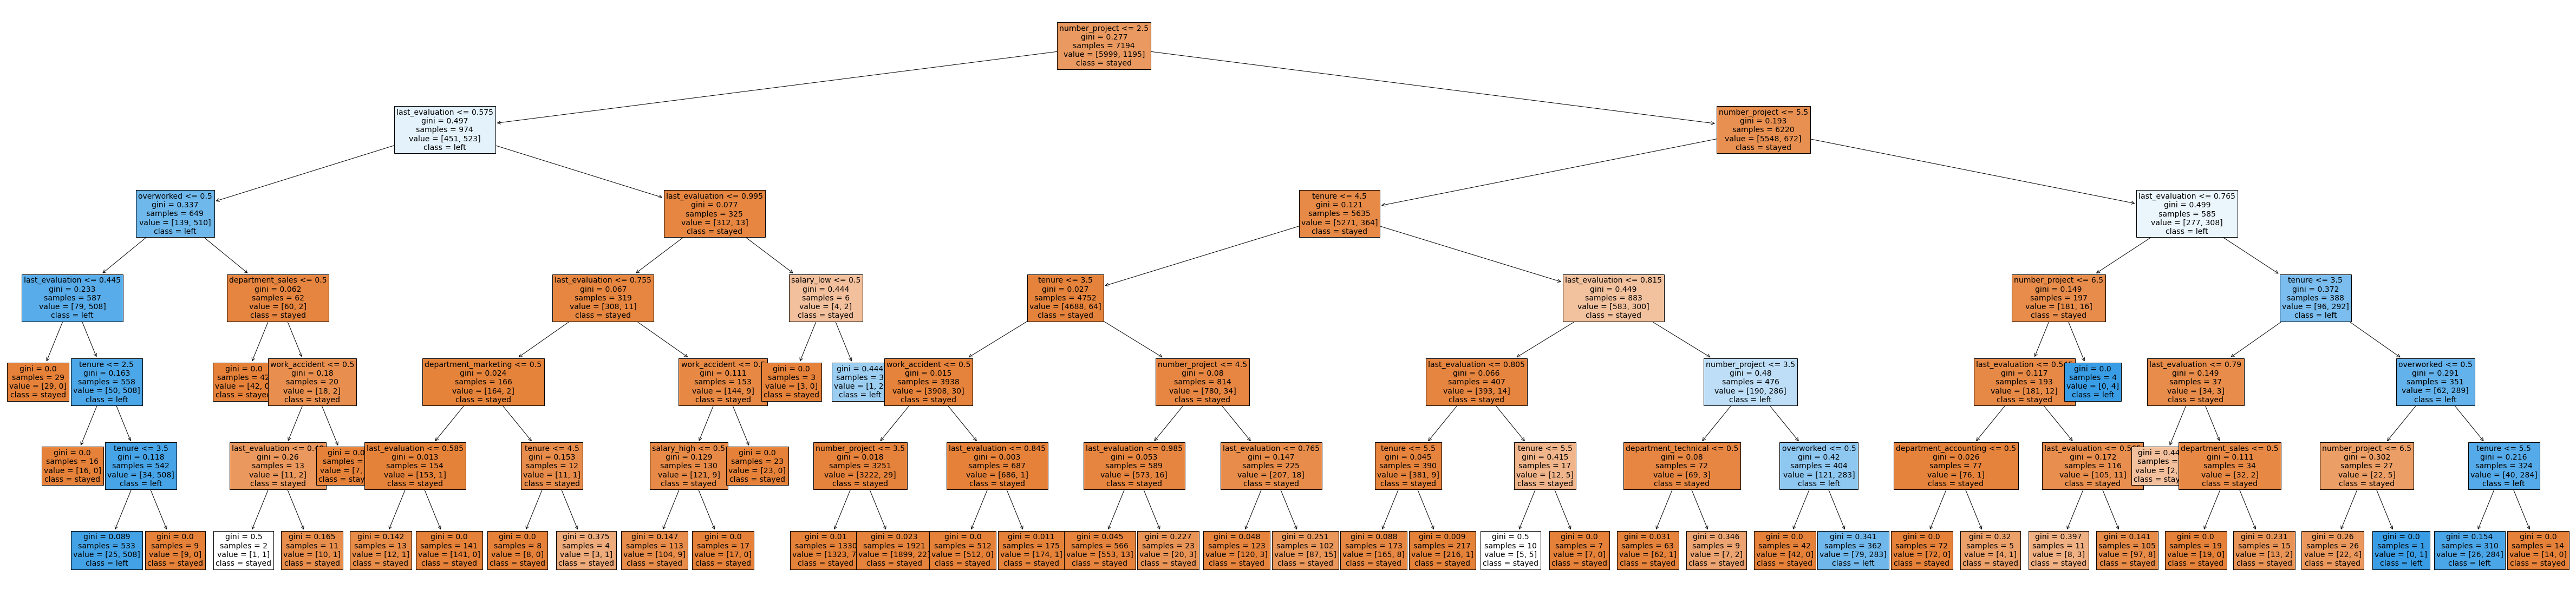

In [41]:
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

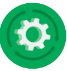
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






- What key insights emerged from your model(s)?

The most important aspects to improve the employees' retention are the satisfaction level (which is subjective, so it is useful only to identify the situation of the employee), number of projects, score in the last evaluation, tenure, and whether the employee is overworked.

- What business recommendations do you propose based on the models built?

It is important to evaluate the workload of the employees. This is because most of the features related to staff exit are related to overworking and number of projects. In the case of being overworked it is seen that surprisingly most of the staff is overworked, working more than 180 hours per month. In the case of the number of projects is essential to consider that to maintain the employees the number of hours worked must be constant when the number of projects increase; also, the number of projects should be closer to 3 or 4, and the number of projects must avoid 7 projects or more (in that case all the employees left the company). In the case of tenure, it is appreciated that there is a crucial error with employees with large ternures. This is because they were not promoted or their salary did not grow despite showing a great performance, something rare considering their loyalty and performance in the company. Finally, the results in the evaluations are important to recognize that in some cases there could be a problem with the capacitation of the staff, it is important to create incentives to make them improve their skills.

- What potential recommendations would you make to your manager/company?

It is important to investigate the cluster of employees who had perfect stats (including satisfaction) and left the company. Also it is important to evaluate why people with more experience in the company have not been promoted despite their loyalty and good performance. Also it is important to evaluate the case of overworking, which is the main cause of the poor staff retention. 


- Do you think your model could be improved? Why or why not? How?

Of course, I consider that this model is propense to overfitting due to the nature of decision trees, so a good approach could be the development of a random forest model in rounds. In the case of the present model it was considered that the Recall metric was working pretty well and there is no need to create a model that consumes more time and effort. Furthermore, the model can be also improved by analyzing the nature of the variables more deeply with the help of an expert in the subject. Another thing to consider is that in this case the evaluation score cannot be totally controlled by the managers, so it wouldn't be a good measure for the model, so it can be deleted to create a new round. Finally, a k-means model would be a perfect way to evaluate the case of the clusters of employees who left the company and also had good scores.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

After conducting feature engineering, the decision tree model achieved AUC of 95.3%, precision of 86.8%, recall of 90.2%, f1-score of 88.5%, and accuracy of 96.1%, on the test set.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Help the employees to advance in their professional careers, so they can present a better performance in the evaluations.

**Next Steps**

I consider that this model is propense to overfitting due to the nature of decision trees, so a good approach could be the develop of a random forest model in rounds. In case of the present model it was considered that the Recall metric was working pretty well and there is no need to create a model that consumes more time and effort. Furthermore, the model can be also improved by analyzing the nature of the variables more deeply with the help of an expert in the subject. Another thing to consider is that in this case the evaluation score that cannot be totally controlled by the managers, so it wouldn't be a good measure for the model, so it can be deleted to create a new round. Finally, a k-means model would be a perfect way to evaluate the case of the clusters of employees who left the company and also had good scores.